# E Commerce AI project 

**Week 2 tasks - Machine Learning Modelling**

In [ ]:
# Importing libraries 
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import Textblob as TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#Loading datasets 
train = pd.read_csv("train.csv")
hidden = pd.read_csv("test_data_hidden.csv", parse_dates=["reviews.date"])

In [ ]:
# Building ML model
X_train = train["reviews.text"]
X_test =  hidden["reviews.text"]
y_train = train["sentiment"]
y_test = hidden["sentiment"]

In [ ]:
# Converting reviews to vectors  using Tf-idf score
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


**ML model building - Base model with imbalanced dataset** 

In [ ]:
# Multinomial Naive Bayes classifyer with imbalanced data
mnb_model = MultinomialNB()
mnb_model.fit(X_train_vec.toarray(),y_train)
# Model performance 
train_accuracy = mnb_model.score(X_train_vec.toarray(), y_train)
test_accuracy = mnb_model.score(X_test_vec.toarray(), y_test)
print(f"MultinimialNB train score is {train_accuracy}, test score is {test_accuracy}")
#print(train_accuracy , test_accuracy)
print()
# Train prediction
train_predictions = mnb_model.predict(X_train_vec.toarray())
train_report = classification_report(y_train, train_predictions)
print("Train classification report\n", train_report)
# Test prediction 
test_predictions = mnb_model.predict(X_test_vec.toarray())
test_report = classification_report(y_test, test_predictions)
print('Test classification report\n', test_report)

MultinimialNB train score is 0.9370877727042111, test score is 0.9368104312938816

Train classification report
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        90
     Neutral       0.00      0.00      0.00       158
    Positive       0.94      1.00      0.97      3694

    accuracy                           0.94      3942
   macro avg       0.31      0.33      0.32      3942
weighted avg       0.88      0.94      0.91      3942

Test classification report
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.31      0.33      0.32       997
weighted avg       0.88      0.94      0.91       997



Notes

> There is a slight difference between train and test accuracy on the base model so overfitting or underfitting are ruled out 



In [ ]:
test_pred = mnb_model.predict(X_test_vec.toarray())
test_pred[0:100]

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positi

Observation

> The bias in the dataset resulted in all predictions to be biased towards the majority class, hence there is need to balance the dataset

> Failure to treat imbalanced dataset degrades the performance of the classifier model hence balancing the dataset is a necessity 





Tackling the imbalanced dataset problem

In [ ]:
# Hybridization - Combining smote and undersampling using SmoteTomek technique 
smt = SMOTETomek()
x_train_smt, y_train_smt = smt.fit_resample(X_train_vec, y_train)

Notes

> Smotetomek algorithm is only applied to train data. The test data remain unchanged so that it represents the original data 



Positive    3749
Neutral     3749
Negative    3749
Name: sentiment, dtype: int64

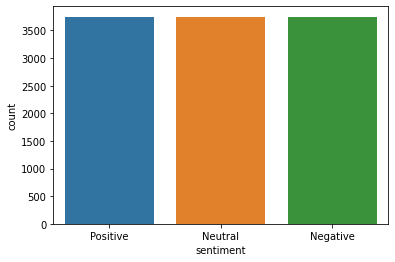

In [ ]:
sns.countplot(y_train_smt)
y_train_smt.value_counts()

In [ ]:
# Multinomial Naive Bayes classifyer with balanced data - SMOTTomek
mnb_smt_model = MultinomialNB()
mnb_smt_model.fit(x_train_smt.toarray(),y_train_smt)
# Model performance 
train_smt_accuracy = mnb_smt_model.score(x_train_smt.toarray(), y_train_smt)
test_smt_accuracy = mnb_smt_model.score(X_test_vec.toarray(), y_test)
print(f"MultinomialNB train score for smt balanced dataset is {train_smt_accuracy}, test score is {test_smt_accuracy}")
print()
# Test prediction 
smt_test_predictions = mnb_smt_model.predict(X_test_vec.toarray())
smt_test_report = classification_report(y_test, smt_test_predictions)
print('Test classification report\n', smt_test_report)

MultinomialNB train score for smt balanced dataset is 0.9658003970402455, test score is 0.8495486459378134

Test classification report
               precision    recall  f1-score   support

    Negative       0.27      0.50      0.35        24
     Neutral       0.16      0.46      0.24        39
    Positive       0.97      0.87      0.92       934

    accuracy                           0.85       997
   macro avg       0.47      0.61      0.50       997
weighted avg       0.92      0.85      0.88       997



In [ ]:
balanced_test_pred = mnb_smt_model.predict(X_test_vec.toarray())
balanced_test_pred[0:100]

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
 

Observations

> Balancing the dataset enabled all the three sentiments (positive, negative and neutral) to be predicted in the model


In [ ]:
# Tree based models 

In [ ]:
# Model building using tree based models- Random Forest classifier balanced data
rcf_balanced_model = RandomForestClassifier()
rcf_balanced_model.fit(x_train_smt.toarray(),y_train_smt)
# Model performance 
train_smt_accuracy = rcf_balanced_model.score(x_train_smt.toarray(), y_train_smt)
test_smt_accuracy = rcf_balanced_model.score(X_test_vec.toarray(), y_test)
print(f"Random forest train score for balanced dataset is {train_smt_accuracy}, test score is {test_smt_accuracy}")
print()
# Test prediction 
balanced_test_predictions = rcf_balanced_model.predict(X_test_vec.toarray())
balanced_test_report = classification_report(y_test, balanced_test_predictions)
print('Test classification report\n', balanced_test_report)

Random forest train score for balanced dataset is 1.0, test score is 0.9528585757271816

Test classification report
               precision    recall  f1-score   support

    Negative       1.00      0.33      0.50        24
     Neutral       0.77      0.26      0.38        39
    Positive       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.91      0.53      0.62       997
weighted avg       0.95      0.95      0.94       997



In [ ]:
# XGBoostClassifier with balanced data 
xgb_balanced_model = XGBClassifier()
xgb_balanced_model.fit(x_train_smt.toarray(),y_train_smt)
# Model performance 
train_smt_accuracy = xgb_balanced_model.score(x_train_smt.toarray(), y_train_smt)
test_smt_accuracy = xgb_balanced_model.score(X_test_vec.toarray(), y_test)
print(f"XGBoost train score for balanced dataset is {train_smt_accuracy}, test score is {test_smt_accuracy}")
print()
# Test prediction 
balanced_test_predictions = xgb_balanced_model.predict(X_test_vec.toarray())
balanced_test_report = classification_report(y_test, balanced_test_predictions)
print('Test classification report\n', balanced_test_report)

XGBoost train score for balanced dataset is 0.9562353365818445, test score is 0.8916750250752257

Test classification report
               precision    recall  f1-score   support

    Negative       0.29      0.38      0.33        24
     Neutral       0.23      0.38      0.29        39
    Positive       0.96      0.93      0.94       934

    accuracy                           0.89       997
   macro avg       0.49      0.56      0.52       997
weighted avg       0.92      0.89      0.90       997



In [ ]:
# Hyper parameter tuning 
rfc_model = RandomForestClassifier()
parameters = [{"n_estimators": [5,10,25,50], "max_depth":[5,10,15,20]}]
clf = GridSearchCV(rfc_model, parameters, cv=5, scoring="accuracy")
clf.fit(x_train_smt, y_train_smt)
clf.best_params_

{'max_depth': 20, 'n_estimators': 50}

Inference:

> Random forest classifier model has the highest accuarcy and f1_score hence performed best compared to multinomialNB and Xgboost classifier


> Best parameters for the random forest classifier were obtained after performing hyper parameter tuning i.e. a max_depth of 20 and n_estimators is 50








In [ ]:
# Using ensemble techniques ( XGBoost + MultinomialNB)
ensemble = VotingClassifier([('M1', mnb_smt_model),
                             ('M2', xgb_balanced_model)])
ensemble.fit(x_train_smt.toarray(),y_train_smt)
# Model performance 
ensemble_train_accuracy = ensemble.score(x_train_smt.toarray(), y_train_smt)
ensemble_test_accuracy = ensemble.score(X_test_vec.toarray(), y_test)
print(f"Ensemble train score for balanced dataset is {ensemble_train_accuracy}, test score is {ensemble_test_accuracy}")
print()
# Test prediction 
ensemble_predictions = ensemble.predict(X_test_vec.toarray())
ensemble_test_report = classification_report(y_test, ensemble_predictions)
print('Test classification report\n', ensemble_test_report)

Ensemble train score for balanced dataset is 0.9544306081934669, test score is 0.8054162487462387

Test classification report
               precision    recall  f1-score   support

    Negative       0.21      0.54      0.30        24
     Neutral       0.14      0.51      0.22        39
    Positive       0.98      0.82      0.89       934

    accuracy                           0.81       997
   macro avg       0.44      0.63      0.47       997
weighted avg       0.92      0.81      0.85       997



In [ ]:
# Using ensemble techniques ( MultinomialNB + RandomForest)
ensemble = VotingClassifier([('M1', mnb_smt_model),
                             ('M2', rcf_balanced_model)])
ensemble.fit(x_train_smt.toarray(),y_train_smt)
# Model performance 
ensemble_train_accuracy = ensemble.score(x_train_smt.toarray(), y_train_smt)
ensemble_test_accuracy = ensemble.score(X_test_vec.toarray(), y_test)
print(f"Ensemble train accuracy score for balanced dataset is {ensemble_train_accuracy}, test score is {ensemble_test_accuracy}")
print()
# Test prediction 
ensemble_predictions = ensemble.predict(X_test_vec.toarray())
ensemble_test_report = classification_report(y_test, ensemble_predictions)
print('Test classification report\n', ensemble_test_report)

Ensemble train accuracy score for balanced dataset is 0.9692293809781628, test score is 0.8495486459378134

Test classification report
               precision    recall  f1-score   support

    Negative       0.27      0.50      0.35        24
     Neutral       0.16      0.46      0.24        39
    Positive       0.97      0.87      0.92       934

    accuracy                           0.85       997
   macro avg       0.47      0.61      0.50       997
weighted avg       0.92      0.85      0.88       997



Week 2 tasks 

In [ ]:
# Model building using SVM
svm_classifier = SVC()
svm_classifier.fit(x_train_smt.toarray(),y_train_smt)
# Model performance 
train_smt_accuracy = svm_classifier.score(x_train_smt.toarray(), y_train_smt)
test_smt_accuracy = svm_classifier.score(X_test_vec.toarray(), y_test)
print(f"SVM train score for balanced dataset is {train_smt_accuracy}, test score is {test_smt_accuracy}")
print()
# Test prediction 
balanced_test_predictions = svm_classifier.predict(X_test_vec.toarray())
balanced_test_report = classification_report(y_test, balanced_test_predictions)
print('Test classification report\n', balanced_test_report)

SVM train score for balanced dataset is 0.9999097635805811, test score is 0.9538615847542627

Test classification report
               precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       1.00      0.26      0.41        39
    Positive       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.98      0.52      0.61       997
weighted avg       0.96      0.95      0.94       997



In [ ]:
# Engineering sentiment scores 

In [ ]:
# Using vader sentiment intensity analyser
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sentiment = SentimentIntensityAnalyzer()
polarity = [round(sentiment.polarity_scores(i)['compound'], 2) for i in train["reviews.text"]]
train["sentiment_scores"] = polarity
       

In [ ]:
def sentiment_score(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return "positive"
train["label"] = train["sentiment_scores"].apply(sentiment_score)

In [ ]:
y_scores = train['label']

In [ ]:
def calc_subjectivity (text):
  return TextBlob(text).sentiment.subjectivity
def calc_polarity (text):
  return TextBlob(text).sentiment.subjectivity
train["subjectivity"]= train["reviews.text"].apply(calc_subjectivity)
train["polarity"] = train["reviews.text"].apply(calc_polarity)

In [ ]:
def scores (score):
  if score <0:
    return 'negative'
  elif score ==0:
    return 'neutral'
  else:
    return 'positive'
train['score'] = train['polarity'].apply(getanalysis)

In [ ]:
train.head()

,reviews.text,sentiment,sentiment_scores,label,subjectivity,polarity,score
0,purchase black fridaypros great price even sal...,Positive,0.96,positive,0.693056,0.693056,positive
1,purchase two amazon echo plus two dot plus fou...,Positive,0.96,positive,0.498214,0.498214,positive
2,average alexa option show things screen still ...,Neutral,0.00,neutral,0.400000,0.400000,positive
3,good product exactly want good price,Positive,0.73,positive,0.483333,0.483333,positive
4,rd one purchase buy one nieces case compare on...,Positive,0.13,positive,0.500000,0.500000,positive


In [ ]:
train["score"].value_counts()

positive    3762
neutral      180
Name: score, dtype: int64

In [ ]:
train['sentiment'].value_counts()

Positive    3694
Neutral      158
Negative      90
Name: sentiment, dtype: int64

In [ ]:
train['label'].value_counts()

positive    3663
negative     157
neutral      122
Name: label, dtype: int64

Insights on engineering sentiment scores:

> Engineering sentiment scores alters the distribution of target variable. When vader's sentiment intensity analyzer was used, more neutral sentiments were observed, they increased from 90 to 122 whilst positive and negative sentiment changed by 1 each. When polarity scores were calculated using textblob, the engineered feature only had positive and neutral sentiments with no negative sentiments. 

